In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
totalmiles=pd.read_csv('/content/totalmiles.csv')
disengagements=pd.read_csv('/content/disengagements.csv')

In [ ]:
disengagements.head();

In [ ]:
totalmiles.head();

In [ ]:
# Total number of AV disengagements over entire duration of available data
Total_number_of_AV_disengagements = len (disengagements.index)
Total_number_of_AV_disengagements

1024

In [ ]:
# Number of unique months that have recorded AV disengagements
len(disengagements['Month'].unique())

15

In [ ]:
# List of unique locations of AV disengagements
disengagements['Location'].unique()

array(['urban-street', 'highway'], dtype=object)

In [ ]:
# Number of unique causes for AV disengagements
len(disengagements['Cause'].unique())

10

In [ ]:
# Missing values in the datasets
disengagements.isna().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
dtype: int64

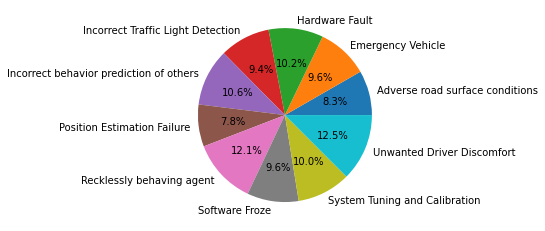

In [ ]:
Group_by_cause=disengagements.groupby("Cause").count()
Plot_Pie=plt.pie(Group_by_cause["Car"],labels=Group_by_cause.index,autopct='%1.1f%%')

In [ ]:
# list the top 2 leading causes of disengagement
Group_by_cause.sort_values(by=['Car'], ascending=False).index[:2]

Index(['Unwanted Driver Discomfort', 'Recklessly behaving agent'], dtype='object', name='Cause')

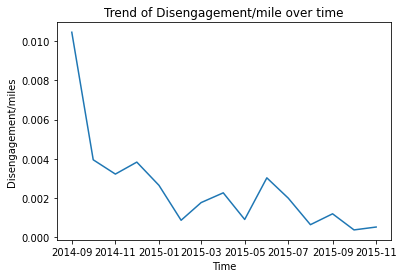

In [ ]:
# Visualize the trend of disengagement/mile over time
'Adding Date column in datetime format'
from datetime import date
from time import strptime
Date = []
for ym in totalmiles['Month']:
    y, m = ym.split('-')
    Date.append(date(int(y)+2000, strptime(m,"%b").tm_mon,1))

'Sorting data by Date'
totalmiles['Date'] = Date
Group_by_Month=totalmiles.groupby("Date").sum()
Group_by_Month.sort_index()

'Plot to visualize the trend of disengagement/mile over time'
plot_trend=plt.plot(Group_by_Month.index,(Group_by_Month["total number of disengagements"]/Group_by_Month["miles driven in autonomous mode"]))
plt.xlabel('Time');
plt.ylabel('Disengagement/miles');
plt.title('Trend of Disengagement/mile over time');

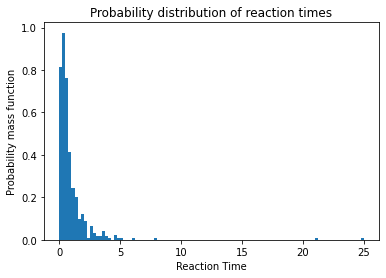

In [ ]:
Dropna_disengagement = disengagements.dropna()
hist = Dropna_disengagement.hist(column='ReactionTime', grid=False, bins=100, density = True)
plt.xlabel('Reaction Time');
plt.ylabel('Probability mass function');
plt.title('Probability distribution of reaction times');

In [ ]:
# For the entire duration of the dataset
disengagements['ReactionTime'].mean(skipna=True)

0.9297703252032526

In [ ]:
# For the entire duration of the dataset differentiated by the location of disengagement
Group_by_location=disengagements.groupby("Location").mean()
Group_by_location

,ReactionTime
Location,
highway,1.48000
urban-street,0.92865


In [ ]:
from scipy.stats import ttest_1samp 
tset, pval = ttest_1samp(Dropna_disengagement.ReactionTime[disengagements['TypeOfTrigger'] == 'automatic'], 1.09)
tset, pval

(-2.0856358487615014, 0.0375284153714078)

In [ ]:
if pval < 0.05:    # significance level alpha = 0.05
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

Rejecting null hypothesis


In [ ]:
from statsmodels.stats import weightstats as stests
ztest, pval = stests.ztest(Dropna_disengagement.ReactionTime[disengagements['TypeOfTrigger'] == 'automatic'], x2 =None, value= 1.09)
ztest, pval

(-2.0856358487615014, 0.037011621483563954)

In [ ]:
if pval < 0.05:    # significance level alpha = 0.05
    print("Rejecting null hypothesis")
else:
    print("Accepting null hypothesis")

Rejecting null hypothesis


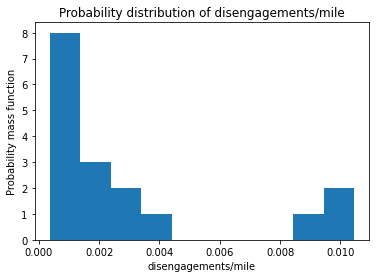

In [ ]:
totalmiles['disengagements/mile'] = totalmiles["total number of disengagements"]/totalmiles['miles driven in autonomous mode']
hist = totalmiles.hist(column='disengagements/mile', grid=False, bins=10)
plt.xlabel('disengagements/mile');
plt.ylabel('Probability mass function');
plt.title('Probability distribution of disengagements/mile');

In [ ]:
# Probability for clear day = 0.72
P_CLEAR_DAY = 0.72

# Probability for AV driving on clear days = cloudy days = 0.5
P_AV_DRIVE_GIVEN_CLEAR_DAY = P_AV_DRIVE_GIVEN_CLOUDY_DAY = 0.5

# Total miles driven
miles_driven_auto_mode = np.sum(totalmiles['miles driven in autonomous mode'])

# Miles driven on clear and cloudy days
miles_driven_clear_day = P_CLEAR_DAY * miles_driven_auto_mode
miles_driven_cloudy_day = (1 - P_CLEAR_DAY) * miles_driven_auto_mode

# Total disengagements on clear and cloudy days
cloudy_disengagements = disengagements.Weather[disengagements['Weather'] == 'cloudy'].count()
clear_disengagements = disengagements.Weather[disengagements['Weather'] == 'clear'].count()

# Total disengagements
total_disengagements = np.sum(totalmiles['total number of disengagements'])

# P(AV disengaged/mile and ____ day) = Total disengagements on ____ days/Miles driven on ____ days'
P_disengaged_mile_cloudy_day = cloudy_disengagements/miles_driven_cloudy_day
P_disengaged_mile_clear_day = clear_disengagements/miles_driven_clear_day

P_disengaged_mile_cloudy_day, P_disengaged_mile_clear_day

(0.005902556775527249, 0.0005195663748517998)

In [ ]:
# Total disengagements on clear and cloudy days with automatic types of trigger 
cloudy_auto_disengagements = disengagements.Weather[disengagements['Weather'] == 'cloudy'][disengagements['TypeOfTrigger'] == 'automatic'].count()
clear_auto_disengagements = disengagements.Weather[disengagements['Weather'] == 'clear'][disengagements['TypeOfTrigger'] == 'automatic'].count()

# P(auto disengaged/mile and ____ day) = Total auto disengagements on ____ days/Miles driven on ____ days'
P_auto_disengaged_mile_cloudy_day = cloudy_auto_disengagements/(miles_driven_cloudy_day)
P_auto_disengaged_mile_clear_day = clear_auto_disengagements/(miles_driven_clear_day)

P_auto_disengaged_mile_cloudy_day, P_auto_disengaged_mile_clear_day

(0.0028063653172267283, 0.00026390673008345393)

In [ ]:
P_12000_150 = 1 - (1-P_disengaged_mile_cloudy_day)**(80)
P_12000_150

0.3772459723827064

In [ ]:
'NULL      : P_disengagement_mile_clear_day - P_disengaged_mile_cloudy_day >= 0'
'ALTERNATE : P_disengagement_mile_clear_day - P_disengaged_mile_cloudy_day <  0'

# P(disengaged/mile) = Total disengagements/Total Miles
P_disenagements_per_mile = total_disengagements/miles_driven_auto_mode
Z = (P_disengaged_mile_clear_day - P_disengaged_mile_cloudy_day)/(P_disenagements_per_mile*(1-P_disenagements_per_mile)*((1/cloudy_disengagements)+(1/clear_disengagements)))**0.5

# Z(p-value<0.05) = -1.645
if Z < (-1.645):
    print('Fail to reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


In [ ]:
# Dataframe for all the disenagements on ______ days and automatic type of trigger
cloudy_dis_auto_df = disengagements[(disengagements['Weather'] == 'cloudy')
                                    & (disengagements['TypeOfTrigger'] == 'automatic')]
clear_dis_auto_df = disengagements[(disengagements['Weather'] == 'clear') 
                                   & (disengagements['TypeOfTrigger'] == 'automatic')]

# Dataframe for all the disenagements on cloudy/clear days and automatic type of trigger when reaction time greater than 0.6/0.9
cloudy_dis_auto_df_06 = cloudy_dis_auto_df[cloudy_dis_auto_df['ReactionTime'] > 0.6]
clear_dis_auto_df_09 = clear_dis_auto_df[clear_dis_auto_df['ReactionTime'] > 0.9]

# Probabilities of auto dis on rt > 0.6/0.9 for cloudy/clear
prob_cloudy_dis_auto_06 = len(cloudy_dis_auto_df_06)/len(cloudy_dis_auto_df)
prob_clear_dis_auto_09 = len(clear_dis_auto_df_09)/len(clear_dis_auto_df)

prob_cloudy_dis_auto_06, prob_clear_dis_auto_09

(0.473551637279597, 0.28125)

In [ ]:
# Prob(Accident|Disengaged) = P((Accident|disengaged)|cloudy) * P(cloudy) + P((Accident|disengaged)|clear) * P(clear)
(prob_cloudy_dis_auto_06 * 0.28) + (prob_clear_dis_auto_09 * 0.72)

0.3350944584382871

In [ ]:
# Prob(Accident) = Total disengagements on accident condition/total miles driven
"{:e}".format((len(cloudy_dis_auto_df_06)+len(clear_dis_auto_df_09))/miles_driven_auto_mode)

'4.255496e-04'

In [ ]:
from scipy.stats import ks_2samp as ks

# Reaction time when cloudy/clear day
cloudy_rt = disengagements.ReactionTime[disengagements['Weather'] == 'cloudy'][disengagements['TypeOfTrigger'] == 'automatic']
clear_rt = disengagements.ReactionTime[disengagements['Weather'] == 'clear'][disengagements['TypeOfTrigger'] == 'automatic']

ks(cloudy_rt, clear_rt)

Ks_2sampResult(statistic=0.05622900923593619, pvalue=0.9534988141679469)

In [ ]:
# Adding 'Class' column in the dataframe
disengagements['Class'] = ''
disengagements.loc[(disengagements['Cause'] == 'Incorrect behavior prediction of others') |
                   (disengagements['Cause'] == 'Recklessly behaving agent') |
                   (disengagements['Cause'] == 'Unwanted Driver Discomfort'),'Class'] = 'Controller'

disengagements.loc[(disengagements['Cause'] == 'Adverse road surface conditions') |
                   (disengagements['Cause'] == 'Emergency Vehicle') |
                   (disengagements['Cause'] == 'Position Estimation Failure') |
                   (disengagements['Cause'] == 'Incorrect Traffic Light Detection'),'Class'] = 'Perception System'

disengagements.loc[(disengagements['Cause'] == 'System Tuning and Calibration') |
                   (disengagements['Cause'] == 'Hardware Fault') |
                   (disengagements['Cause'] == 'Software Froze'),'Class'] = 'Computer System'

disengagements.head();

In [ ]:
# Creating random index between 0 to 1023 for 80-20 data split
Train_Index_List = []
Test_Index_List  = []
for i in range(1,6):
    np.random.seed(i)
    tot = list(np.arange(0,1024,1))
    np.random.shuffle(tot)
    train = tot[:820]
    test = [x for x in tot if x not in train]
    Train_Index_List.append(train)
    Test_Index_List.append(test)

In [ ]:
# Created a new data frame with required columns for Naive Bayes Model development
NB_disengagement = disengagements[['Location','Weather','TypeOfTrigger','Class']]

In [ ]:
# Created a new dataframe for first train split from randomly generated indices
train1 = Train_Index_List[0]
test1  = Test_Index_List[0]
NB_train = NB_disengagement.iloc[train1,:]
NB_train.head()

,Location,Weather,TypeOfTrigger,Class
830,urban-street,cloudy,manual,Perception System
795,urban-street,cloudy,automatic,Controller
495,urban-street,clear,automatic,Computer System
822,urban-street,cloudy,automatic,Perception System
859,urban-street,cloudy,automatic,Perception System


In [ ]:
# Pivot table for each features vs Class to determine conditional probability table
NB_train_Location = NB_train.pivot_table(index='Class', columns='Location', aggfunc='size', fill_value=0)
NB_train_Weather = NB_train.pivot_table(index='Class', columns='Weather', aggfunc='size', fill_value=0)
NB_train_TypeOfTrigger = NB_train.pivot_table(index='Class', columns='TypeOfTrigger', aggfunc='size', fill_value=0)

NB_train_Location

Location,highway,urban-street
Class,,
Computer System,17,229
Controller,0,300
Perception System,0,274


In [ ]:
 NB_train_Weather

Weather,clear,cloudy
Class,,
Computer System,152,94
Controller,1,299
Perception System,0,274


In [ ]:
NB_train_TypeOfTrigger

TypeOfTrigger,automatic,manual
Class,,
Computer System,119,127
Controller,34,266
Perception System,228,46


In [ ]:
# Calculating and creating a dataframe for storing conditional probability table
Prior_NB_Train = pd.DataFrame(NB_train_Location.sum(axis=1)/NB_train_Location.sum().sum(), columns = ['Class'])
Prior_NB_Train['highway'] = NB_train_Location['highway'].values/NB_train_Location.sum(axis=1)
Prior_NB_Train['urban-street'] = NB_train_Location['urban-street'].values/NB_train_Location.sum(axis=1)

Prior_NB_Train['clear'] = NB_train_Weather['clear'].values/NB_train_Weather.sum(axis=1)
Prior_NB_Train['cloudy'] = NB_train_Weather['cloudy'].values/NB_train_Weather.sum(axis=1)

Prior_NB_Train['automatic'] = NB_train_TypeOfTrigger['automatic'].values/NB_train_TypeOfTrigger.sum(axis=1)
Prior_NB_Train['manual'] = NB_train_TypeOfTrigger['manual'].values/NB_train_TypeOfTrigger.sum(axis=1)
Prior_NB_Train.index = NB_train_TypeOfTrigger.index
Prior_NB_Train.columns = pd.MultiIndex(levels=[['','Location', 'Weather', 'TypeOfTrigger'], 
                                               ['Class','highway','urban-street','clear','cloudy','automatic','manual']], 
                                       codes= [[0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 3, 4, 5, 6]])
Prior_NB_Train

Location  ... TypeOfTrigger          
                      Class   highway  ...     automatic    manual
Class                                  ...                        
Computer System    0.300000  0.069106  ...      0.483740  0.516260
Controller         0.365854  0.000000  ...      0.113333  0.886667
Perception System  0.334146  0.000000  ...      0.832117  0.167883

[3 rows x 7 columns]

In [ ]:
# User-defined function for Naive Bayes Model
def NB_Model(Input_list, df):
    P = pd.DataFrame(df.loc[:,('','Class')].values * df.loc[:, ('Location',Input_list[0])].values * df.loc[:, ('Weather',Input_list[1])].values * df.loc[:, ('TypeOfTrigger',Input_list[2])].values,
                     index=df.index, columns=['Probability'])
    return P[P['Probability'] == max(P['Probability'])].index[0]

# Testing Naive Bayes Model for specific set of features
NB_Model(['urban-street', 'cloudy', 'manual'],df = Prior_NB_Train)

'Controller'

In [ ]:
# Created a new dataframe for first test split from randomly generated indices
NB_test = NB_disengagement.iloc[test1,:]
NB_test.head()

,Location,Weather,TypeOfTrigger,Class
646,urban-street,cloudy,manual,Controller
811,urban-street,cloudy,manual,Perception System
628,urban-street,cloudy,manual,Controller
212,urban-street,cloudy,manual,Controller
984,urban-street,cloudy,manual,Controller


In [ ]:
# Overall accuracy of NB model generated from train1 and tested on test1
NB_test['Predicted Class'] = [NB_Model(NB_test.iloc[i,:3].values,df=Prior_NB_Train) for i in range(len(NB_test))]
(NB_test["Class"]==NB_test["Predicted Class"]).value_counts(normalize=True)[1]

0.7598039215686274

In [ ]:
# Generating Confusion Matrix for NB model tested on test1
df_confusion = pd.crosstab(NB_test["Class"], NB_test["Predicted Class"])
df_confusion['Predicted Accuracy'] = np.diag(df_confusion)/df_confusion.sum(axis=1)
df_confusion.columns = pd.Index(['CS', 'C', 'PS', 'Predicted Accuracy'],
                                dtype='object', name='Predicted Class')
df_confusion.index = pd.Index(['CS', 'C', 'PS'],
                                dtype='object', name='Actual Class')
df_confusion

Predicted Class,CS,C,PS,Predicted Accuracy
Actual Class,,,,
CS,38,11,9,0.655172
C,0,47,14,0.770492
PS,0,15,70,0.823529


In [ ]:
# Running NB model on 5 random 80-20 split data and recording confusion matrix and accuracy
Accuracy = []
Confusion_Matrix_List = []
for train, test in zip(Train_Index_List, Test_Index_List):
    
    NB_train = NB_disengagement.iloc[train,:]
    NB_test = NB_disengagement.iloc[test,:]
    
    NB_train_Location = NB_train.pivot_table(index='Class', columns='Location', aggfunc='size', fill_value=0)
    NB_train_Weather = NB_train.pivot_table(index='Class', columns='Weather', aggfunc='size', fill_value=0)
    NB_train_TypeOfTrigger = NB_train.pivot_table(index='Class', columns='TypeOfTrigger', aggfunc='size', fill_value=0)
    
    Prior_NB_Train = pd.DataFrame(NB_train_Location.sum(axis=1)/NB_train_Location.sum().sum(), columns = ['Class'])
    Prior_NB_Train['highway'] = NB_train_Location['highway'].values/NB_train_Location.sum(axis=1)
    Prior_NB_Train['urban-street'] = NB_train_Location['urban-street'].values/NB_train_Location.sum(axis=1)

    Prior_NB_Train['clear'] = NB_train_Weather['clear'].values/NB_train_Weather.sum(axis=1)
    Prior_NB_Train['cloudy'] = NB_train_Weather['cloudy'].values/NB_train_Weather.sum(axis=1)

    Prior_NB_Train['automatic'] = NB_train_TypeOfTrigger['automatic'].values/NB_train_TypeOfTrigger.sum(axis=1)
    Prior_NB_Train['manual'] = NB_train_TypeOfTrigger['manual'].values/NB_train_TypeOfTrigger.sum(axis=1)
    Prior_NB_Train.index = NB_train_TypeOfTrigger.index
    
    Prior_NB_Train.columns = pd.MultiIndex(levels=[['','Location', 'Weather', 'TypeOfTrigger'], 
                                                   ['Class','highway','urban-street','clear','cloudy','automatic','manual']], 
                                           codes= [[0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 3, 4, 5, 6]])

    
    NB_test['Predicted Class'] = [NB_Model(NB_test.iloc[i,:3].values,df=Prior_NB_Train) for i in range(len(NB_test))]
    
    Accuracy.append((NB_test["Class"]==NB_test["Predicted Class"]).value_counts(normalize=True)[1])
    
    df_confusion = pd.crosstab(NB_test["Class"], NB_test["Predicted Class"])
    df_confusion['Predicted Accuracy'] = np.diag(df_confusion)/df_confusion.sum(axis=1)
    df_confusion.columns = pd.Index(['CS', 'C', 'PS', 'Predicted Accuracy'],
                                dtype='object', name='Predicted Class')
    df_confusion.index = pd.Index(['CS', 'C', 'PS'],
                                dtype='object', name='Actual Class')
    
    Confusion_Matrix_List.append(df_confusion)    

In [ ]:
# Confusion matrix and accuracy for all five training-testing sets
for C,A in zip(Confusion_Matrix_List, Accuracy):
    print(C)
    print('Total Accuracy =',A)
    print()

Predicted Class  CS   C  PS  Predicted Accuracy
Actual Class                                   
CS               38  11   9            0.655172
C                 0  47  14            0.770492
PS                0  15  70            0.823529
Total Accuracy = 0.7598039215686274

Predicted Class  CS   C  PS  Predicted Accuracy
Actual Class                                   
CS               43  10  11            0.671875
C                 0  58   6            0.906250
PS                0  13  63            0.828947
Total Accuracy = 0.803921568627451

Predicted Class  CS   C  PS  Predicted Accuracy
Actual Class                                   
CS               40  12  13            0.615385
C                 0  72   8            0.900000
PS                0  11  48            0.813559
Total Accuracy = 0.7843137254901961

Predicted Class  CS   C  PS  Predicted Accuracy
Actual Class                                   
CS               47   9   8            0.734375
C                 0  65   

In [ ]:
# Average accuracy from all five training-testing sets
"{:0.2f}%".format(np.mean(Accuracy)*100)

'79.61%'